In [1]:
options(warn=-1)
MyData = read.csv("data/PFP_nocor_30cm.csv")

In [2]:
# PFP is Yield / (Inorganic + Manure + Straw _N)
all(abs(MyData$PFP_N - MyData$Yield / (MyData$Inorganic_N + MyData$Manure.cake_N + MyData$Straw_N)) < 0.000000000001)

[1] TRUE

In [3]:
m = lm(PFP_N~Yield+Inorganic_N + Manure.cake_N + Straw_N, MyData)
summary(m) # R² = 0.86


Call:
lm(formula = PFP_N ~ Yield + Inorganic_N + Manure.cake_N + Straw_N, 
    data = MyData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5896 -1.7450 -0.3802  0.9979 25.4497 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.368e+01  3.056e-01 110.197  < 2e-16 ***
Yield          4.546e-03  5.404e-05  84.123  < 2e-16 ***
Inorganic_N   -1.399e-01  2.605e-03 -53.676  < 2e-16 ***
Manure.cake_N -1.802e-01  4.357e-03 -41.367  < 2e-16 ***
Straw_N       -1.081e-01  3.021e-02  -3.578 0.000361 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.519 on 1153 degrees of freedom
Multiple R-squared:  0.867,	Adjusted R-squared:  0.8665 
F-statistic:  1878 on 4 and 1153 DF,  p-value: < 2.2e-16


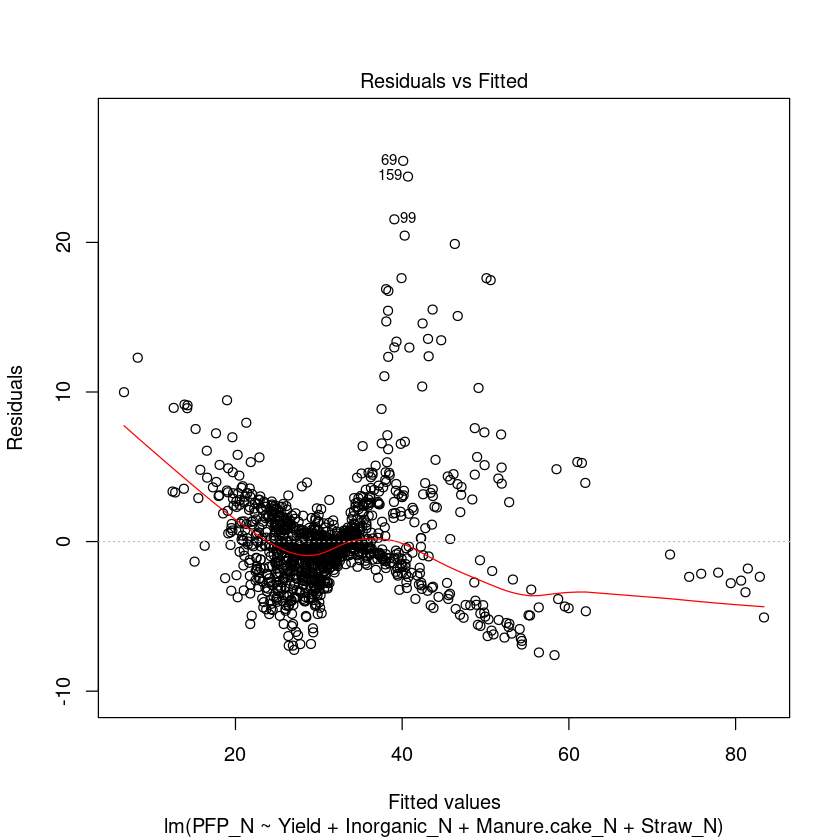

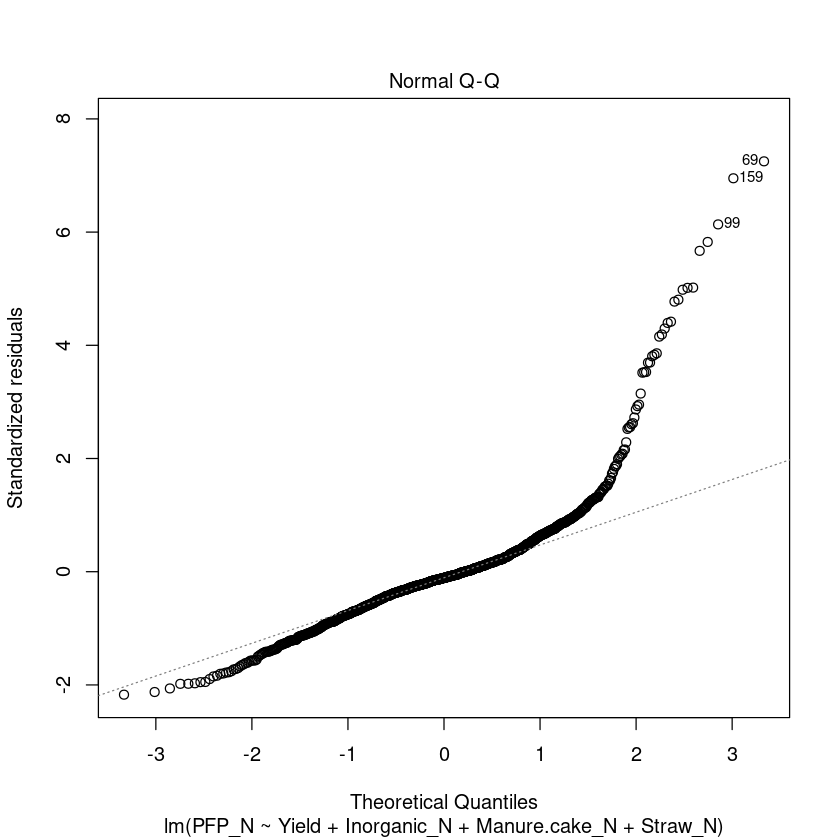

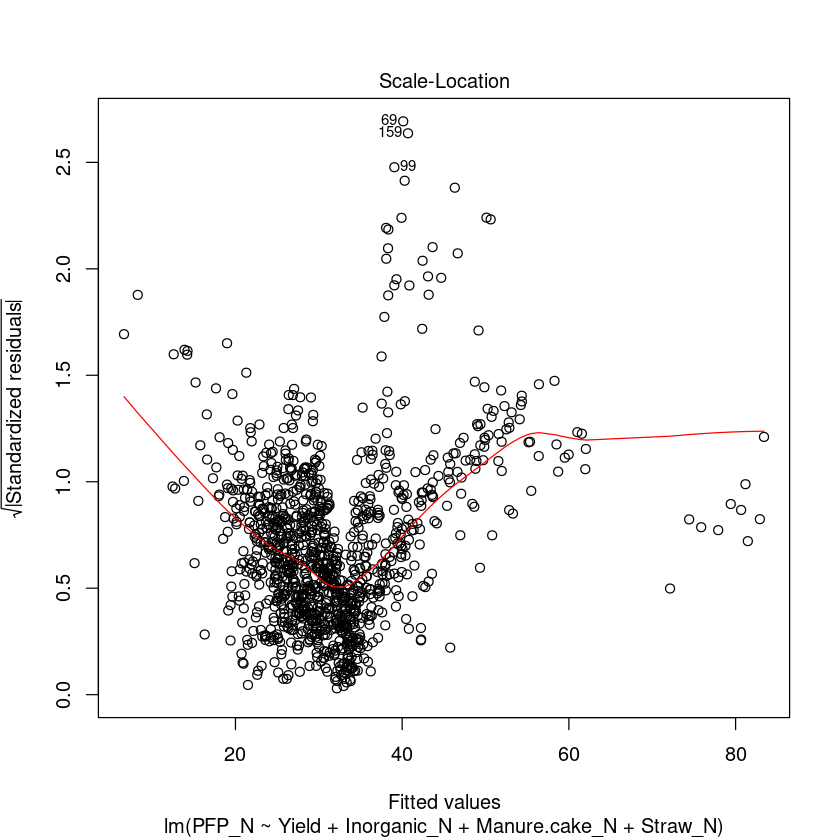

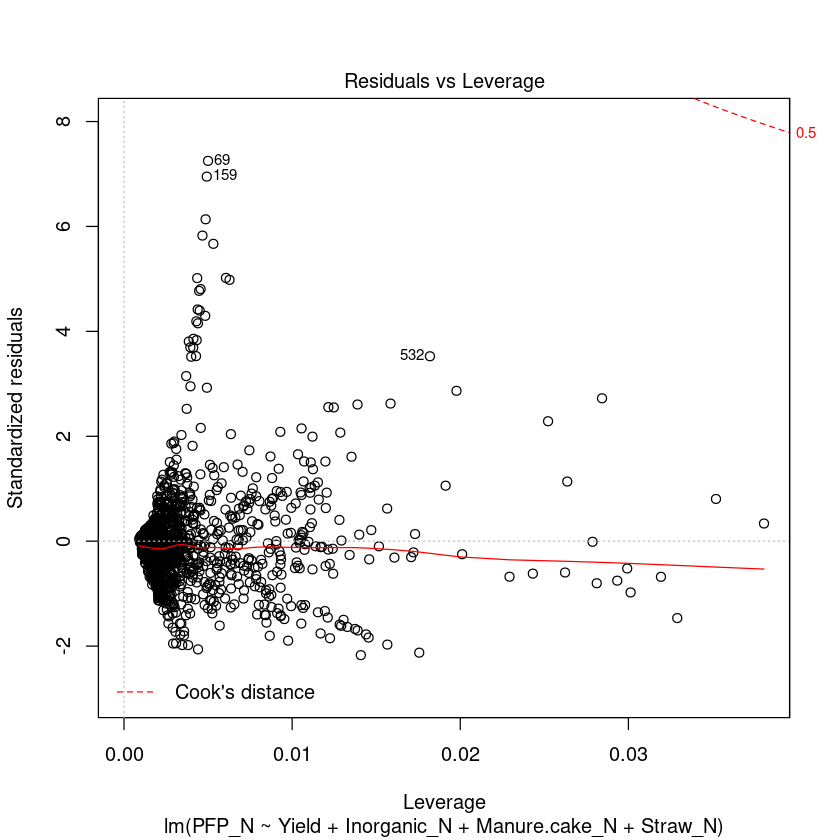

In [4]:
plot(m)

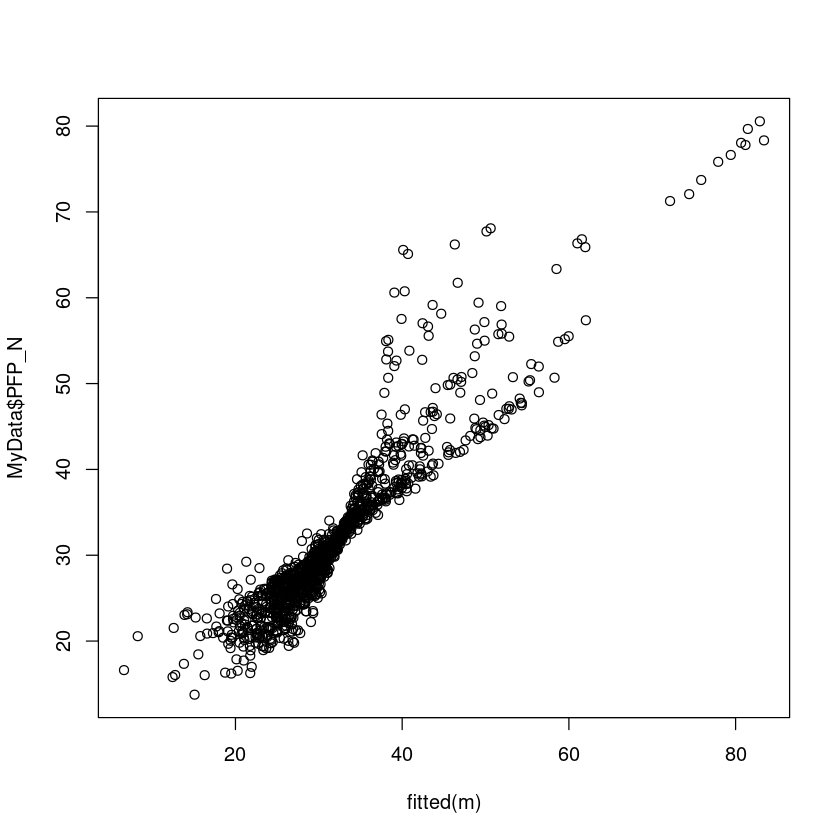

In [5]:
plot(MyData$PFP_N ~ fitted(m))

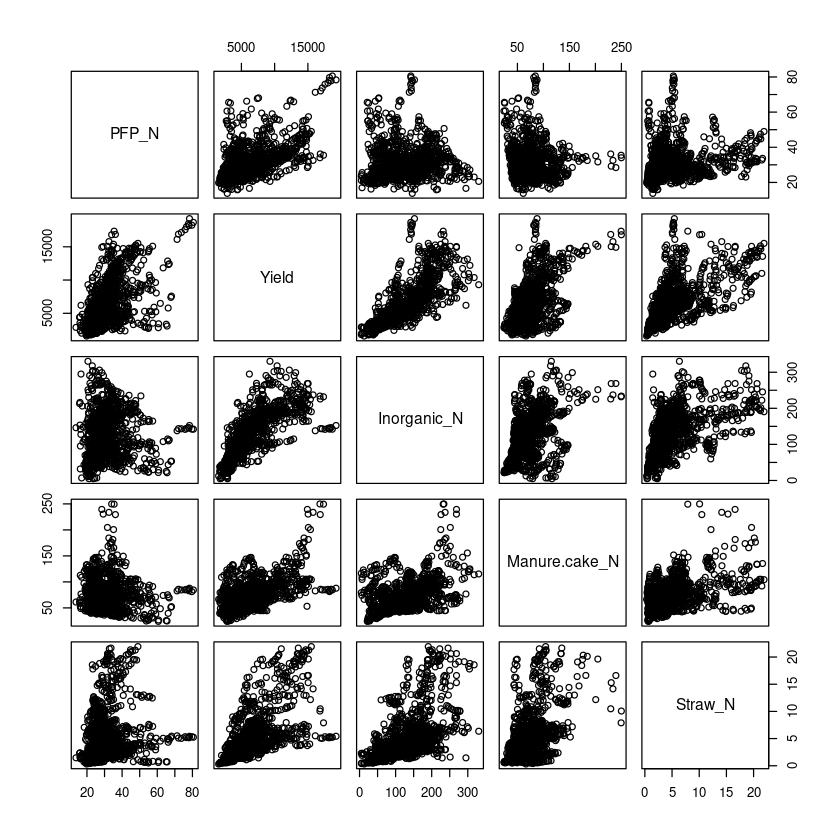

In [6]:
pairs(m$model)

In [7]:
cor(m$model)

PFP_N       Yield     Inorganic_N Manure.cake_N Straw_N  
PFP_N          1.00000000 0.5380698 0.01273202  -0.06795343   0.1503030
Yield          0.53806977 1.0000000 0.75763062   0.58241514   0.6238728
Inorganic_N    0.01273202 0.7576306 1.00000000   0.45099490   0.5754688
Manure.cake_N -0.06795343 0.5824151 0.45099490   1.00000000   0.4741278
Straw_N        0.15030300 0.6238728 0.57546881   0.47412778   1.0000000

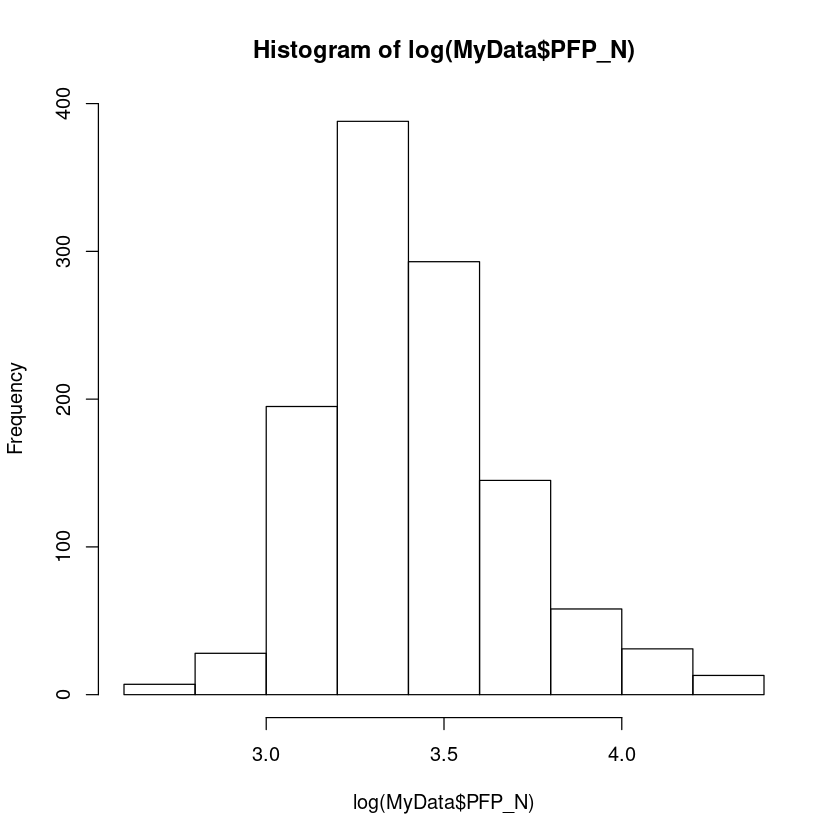

In [8]:
hist(log(MyData$PFP_N))

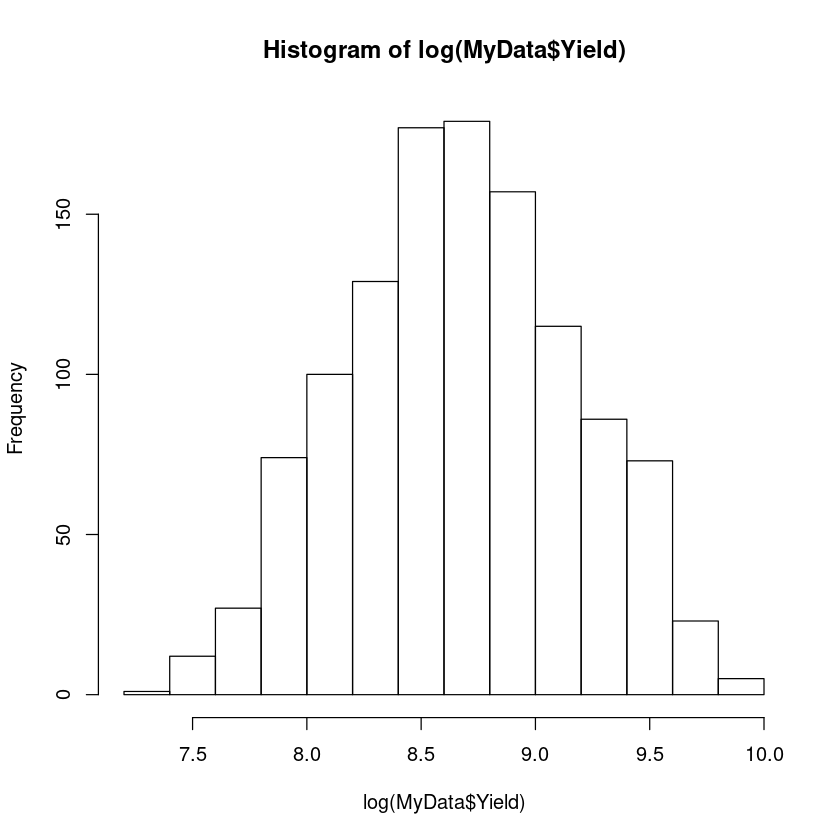

In [9]:
hist(log(MyData$Yield))

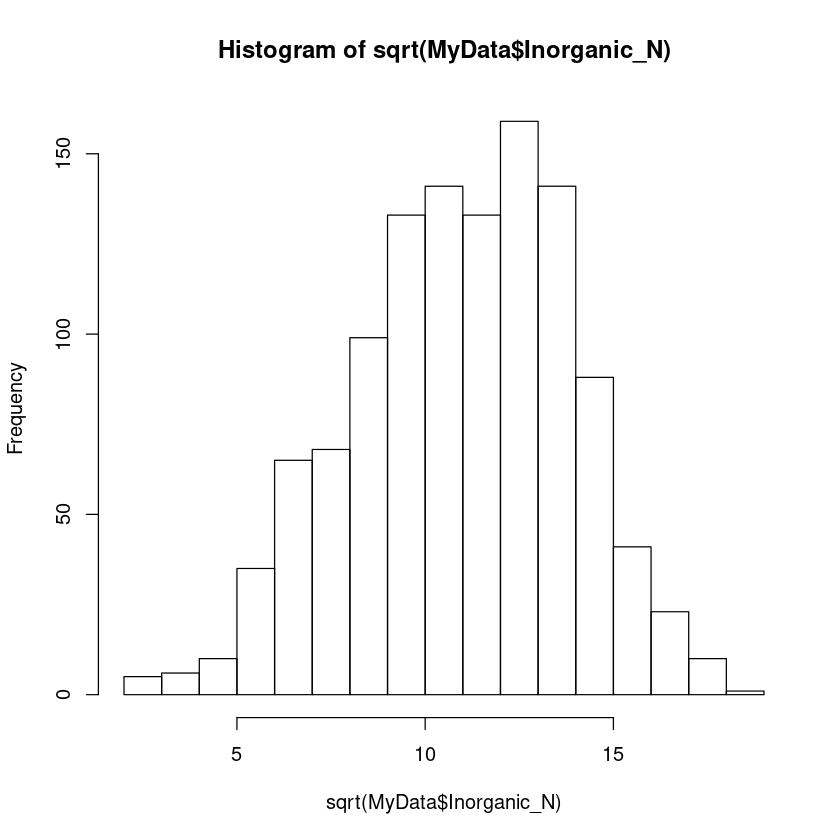

In [10]:
hist(sqrt(MyData$Inorganic_N))

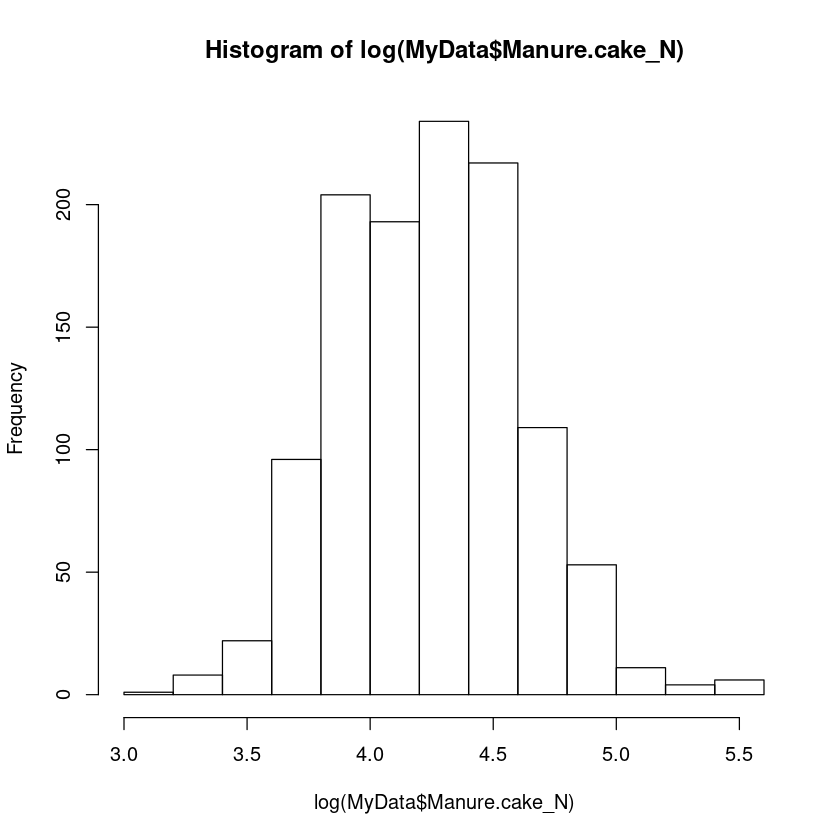

In [11]:
hist(log(MyData$Manure.cake_N))

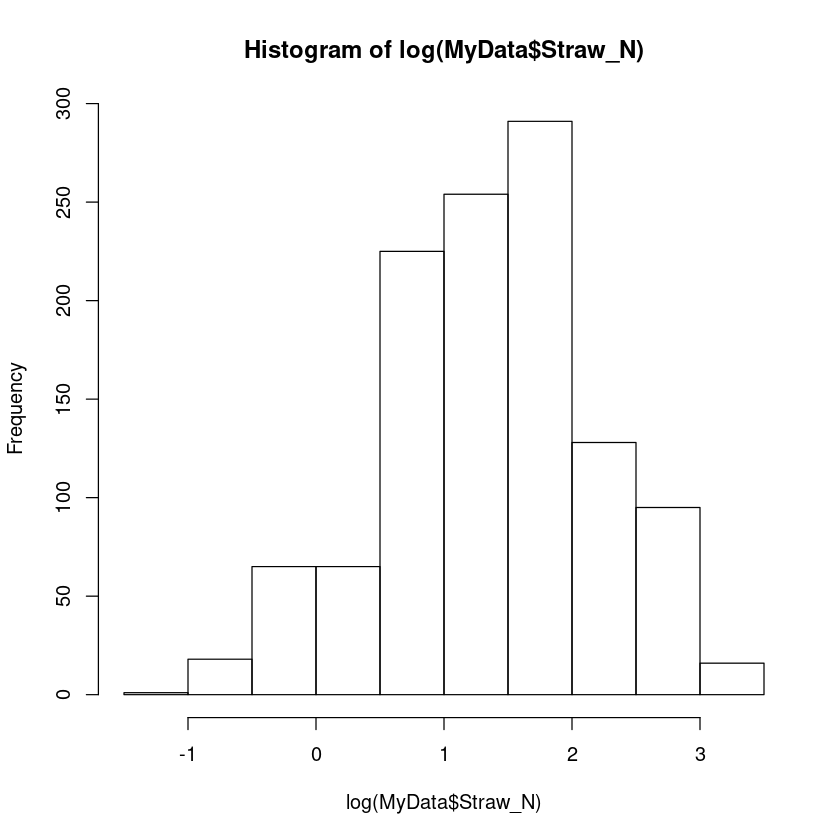

In [12]:
hist(log(MyData$Straw_N))

In [13]:
mt = lm(log(PFP_N)~log(Yield)+sqrt(Inorganic_N)+log(Manure.cake_N)+log(Straw_N), MyData)
summary(mt) # R² of 0.96!


Call:
lm(formula = log(PFP_N) ~ log(Yield) + sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N), data = MyData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.290944 -0.027379 -0.000428  0.019560  0.233108 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.5529170  0.0442804  -57.65   <2e-16 ***
log(Yield)          1.0429551  0.0062926  165.74   <2e-16 ***
sqrt(Inorganic_N)  -0.1097419  0.0009492 -115.61   <2e-16 ***
log(Manure.cake_N) -0.4293904  0.0049638  -86.50   <2e-16 ***
log(Straw_N)       -0.0375632  0.0027774  -13.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05117 on 1153 degrees of freedom
Multiple R-squared:  0.9642,	Adjusted R-squared:  0.9641 
F-statistic:  7762 on 4 and 1153 DF,  p-value: < 2.2e-16


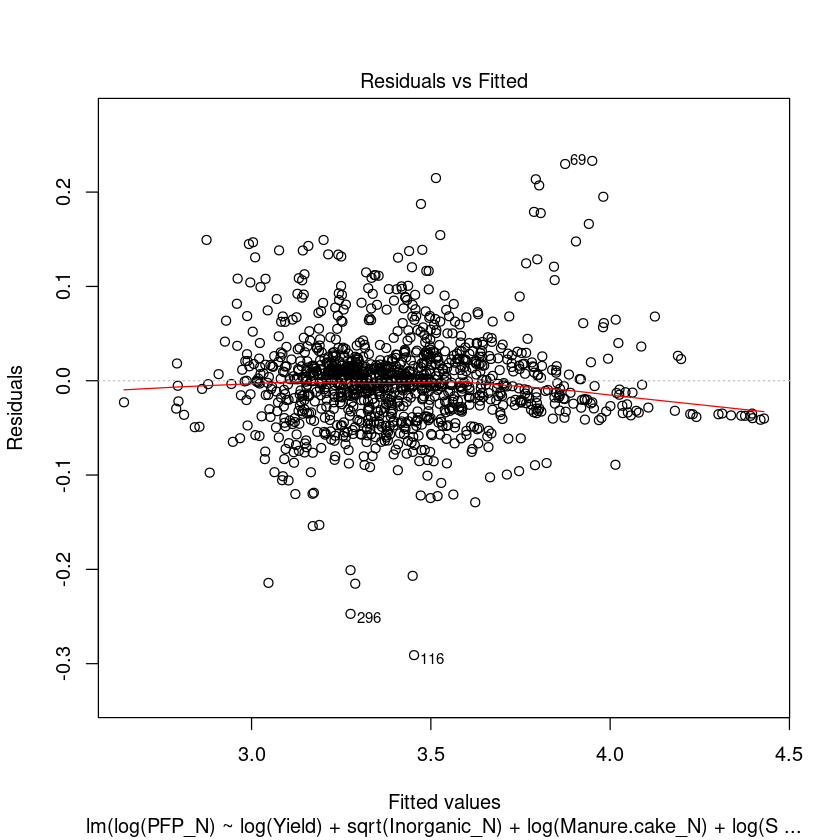

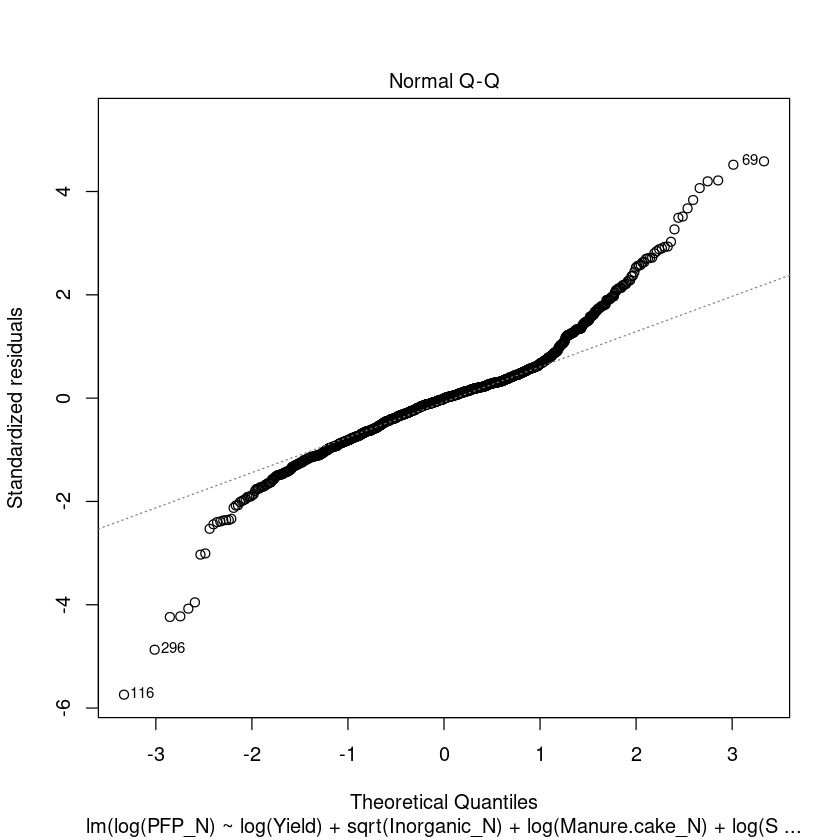

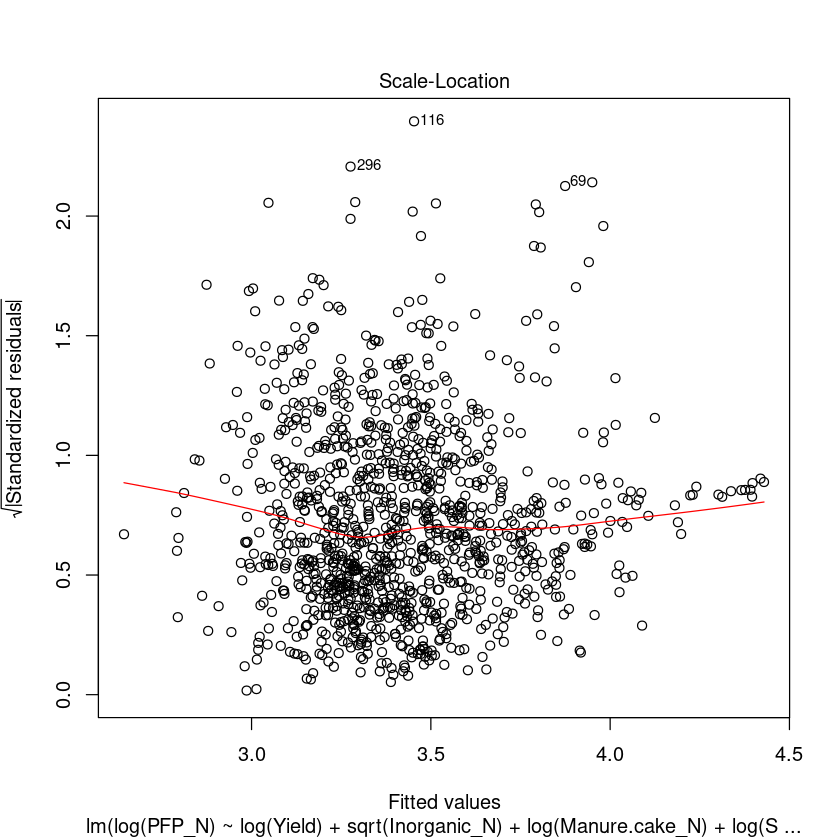

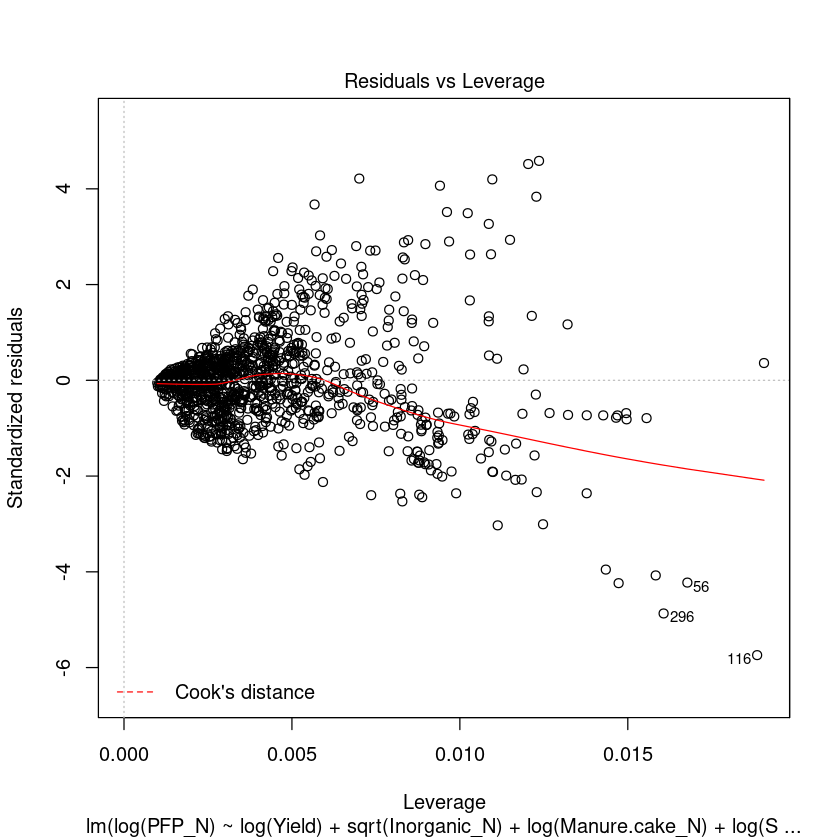

In [14]:
plot(mt)

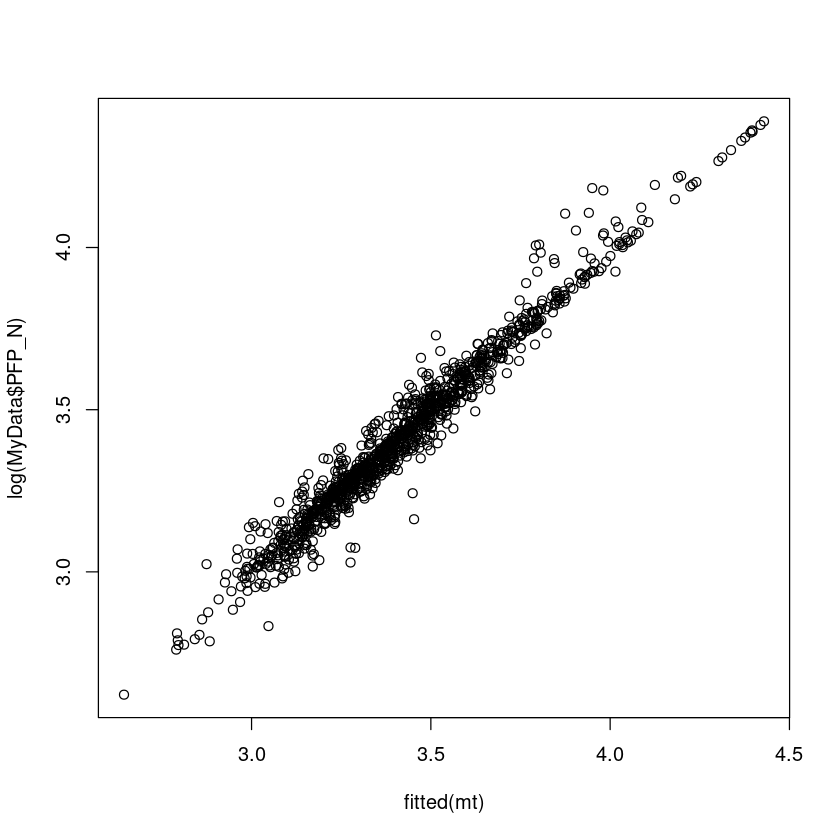

In [15]:
plot(log(MyData$PFP_N)~fitted(mt))

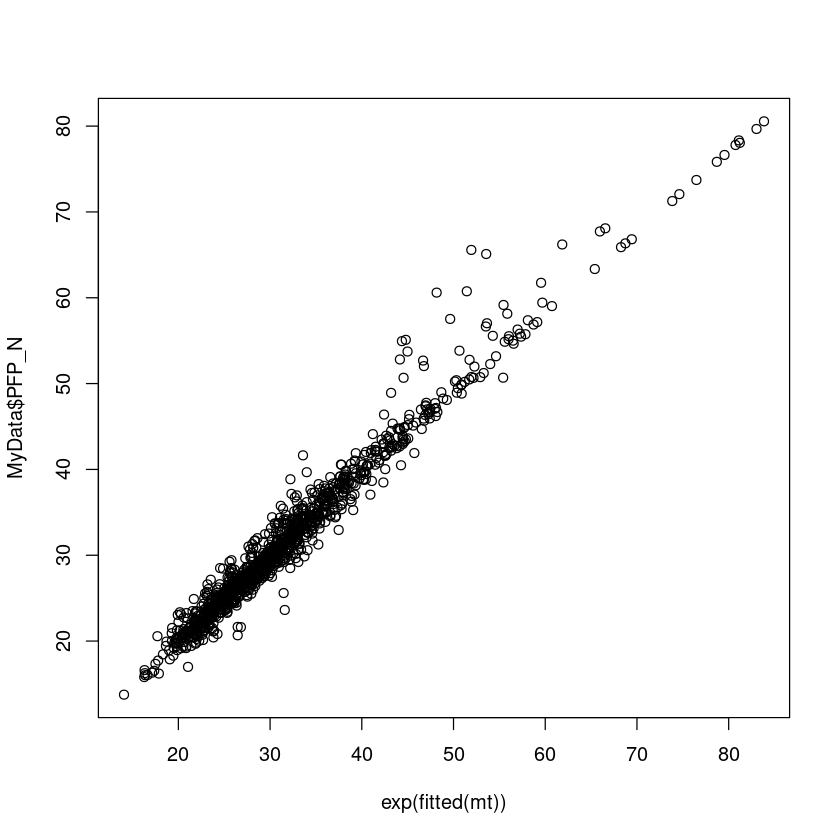

In [16]:
plot(MyData$PFP_N~exp(fitted(mt)))

In [17]:
step(mt)

Start:  AIC=-6879.65
log(PFP_N) ~ log(Yield) + sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N)

                     Df Sum of Sq    RSS     AIC
<none>                             3.019 -6879.7
- log(Straw_N)        1     0.479  3.498 -6711.1
- log(Manure.cake_N)  1    19.592 22.611 -4549.9
- sqrt(Inorganic_N)   1    34.995 38.013 -3948.3
- log(Yield)          1    71.923 74.941 -3162.3



Call:
lm(formula = log(PFP_N) ~ log(Yield) + sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N), data = MyData)

Coefficients:
       (Intercept)          log(Yield)   sqrt(Inorganic_N)  log(Manure.cake_N)  
          -2.55292             1.04296            -0.10974            -0.42939  
      log(Straw_N)  
          -0.03756  


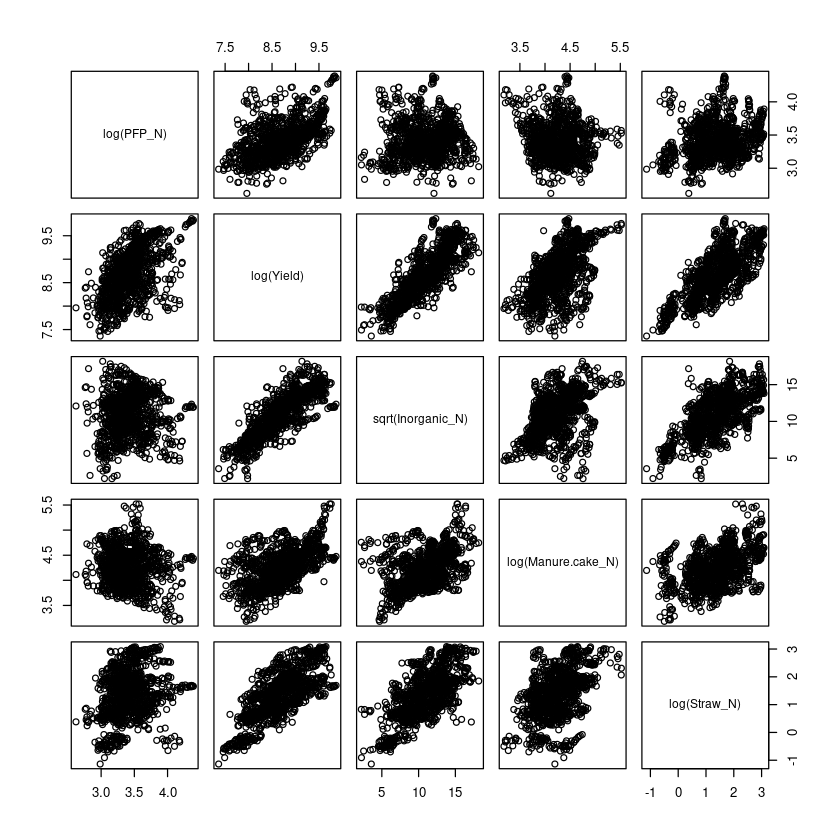

In [18]:
pairs(mt$model)

In [19]:
mti = lm(log(PFP_N)~log(Yield)*(sqrt(Inorganic_N)+log(Manure.cake_N)+log(Straw_N)), MyData)
summary(mti) # 0.98, we're nearly perfect


Call:
lm(formula = log(PFP_N) ~ log(Yield) * (sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N)), data = MyData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.233487 -0.018104  0.005619  0.021647  0.123118 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.550657   0.212484  21.416  < 2e-16 ***
log(Yield)                     0.219767   0.024852   8.843  < 2e-16 ***
sqrt(Inorganic_N)             -0.137325   0.009975 -13.766  < 2e-16 ***
log(Manure.cake_N)            -2.001242   0.052273 -38.285  < 2e-16 ***
log(Straw_N)                  -0.007524   0.030888  -0.244  0.80758    
log(Yield):sqrt(Inorganic_N)   0.003220   0.001154   2.791  0.00535 ** 
log(Yield):log(Manure.cake_N)  0.181336   0.006113  29.662  < 2e-16 ***
log(Yield):log(Straw_N)       -0.002872   0.003558  -0.807  0.41968    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03462

In [20]:
mtir = step(mti)

Start:  AIC=-7781.25
log(PFP_N) ~ log(Yield) * (sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N))

                                Df Sum of Sq    RSS     AIC
- log(Yield):log(Straw_N)        1   0.00078 1.3794 -7782.6
<none>                                       1.3786 -7781.3
- log(Yield):sqrt(Inorganic_N)   1   0.00934 1.3879 -7775.4
- log(Yield):log(Manure.cake_N)  1   1.05477 2.4334 -7125.3

Step:  AIC=-7782.6
log(PFP_N) ~ log(Yield) + sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N) + log(Yield):sqrt(Inorganic_N) + log(Yield):log(Manure.cake_N)

                                Df Sum of Sq    RSS     AIC
<none>                                       1.3794 -7782.6
- log(Yield):sqrt(Inorganic_N)   1   0.01137 1.3908 -7775.1
- log(Straw_N)                   1   0.34191 1.7213 -7528.2
- log(Yield):log(Manure.cake_N)  1   1.07755 2.4569 -7116.1


In [21]:
summary(mtir)


Call:
lm(formula = log(PFP_N) ~ log(Yield) + sqrt(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N) + log(Yield):sqrt(Inorganic_N) + log(Yield):log(Manure.cake_N), 
    data = MyData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23059 -0.01803  0.00553  0.02150  0.12472 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.4908461  0.1991179  22.554  < 2e-16 ***
log(Yield)                     0.2267052  0.0233148   9.724  < 2e-16 ***
sqrt(Inorganic_N)             -0.1317517  0.0071993 -18.301  < 2e-16 ***
log(Manure.cake_N)            -1.9939178  0.0514715 -38.738  < 2e-16 ***
log(Straw_N)                  -0.0324110  0.0019188 -16.891  < 2e-16 ***
log(Yield):sqrt(Inorganic_N)   0.0025793  0.0008373   3.081  0.00211 ** 
log(Yield):log(Manure.cake_N)  0.1804749  0.0060187  29.986  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03462 on 1151

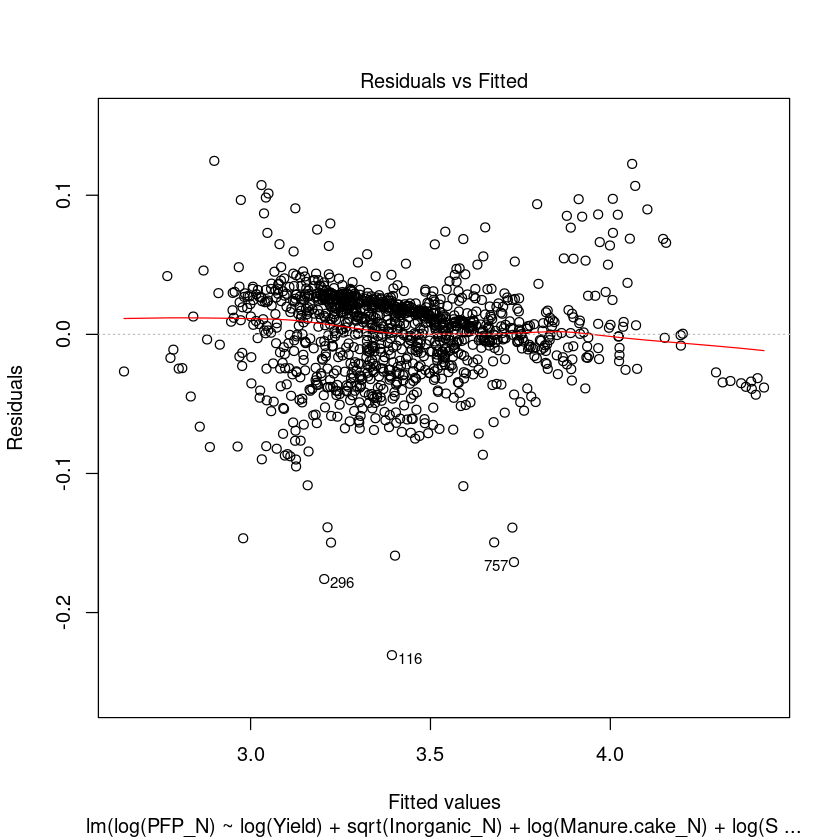

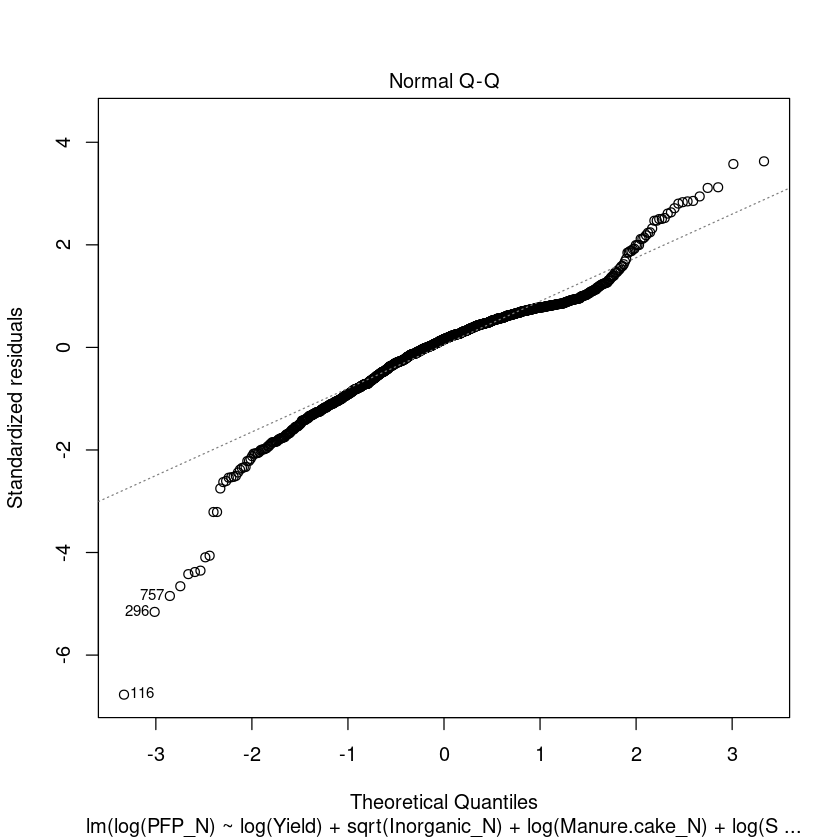

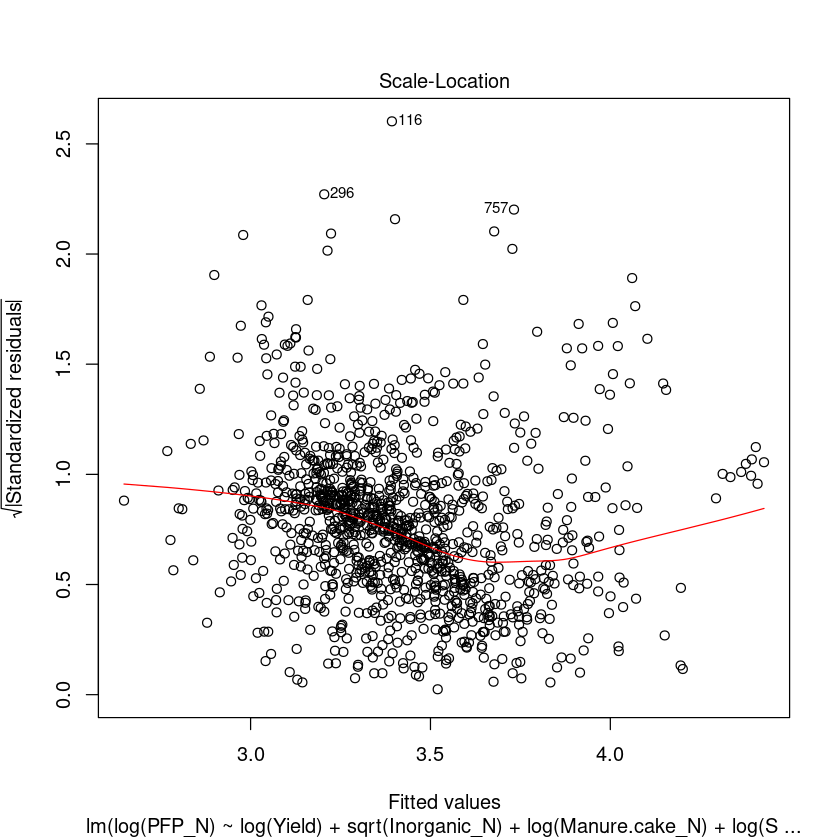

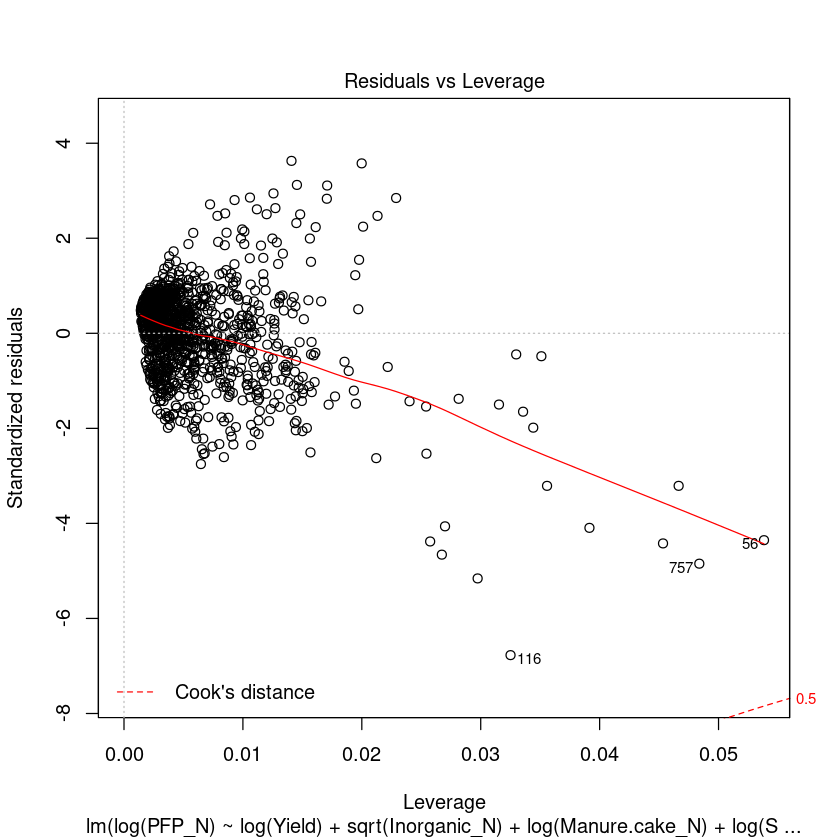

In [22]:
plot(mtir)

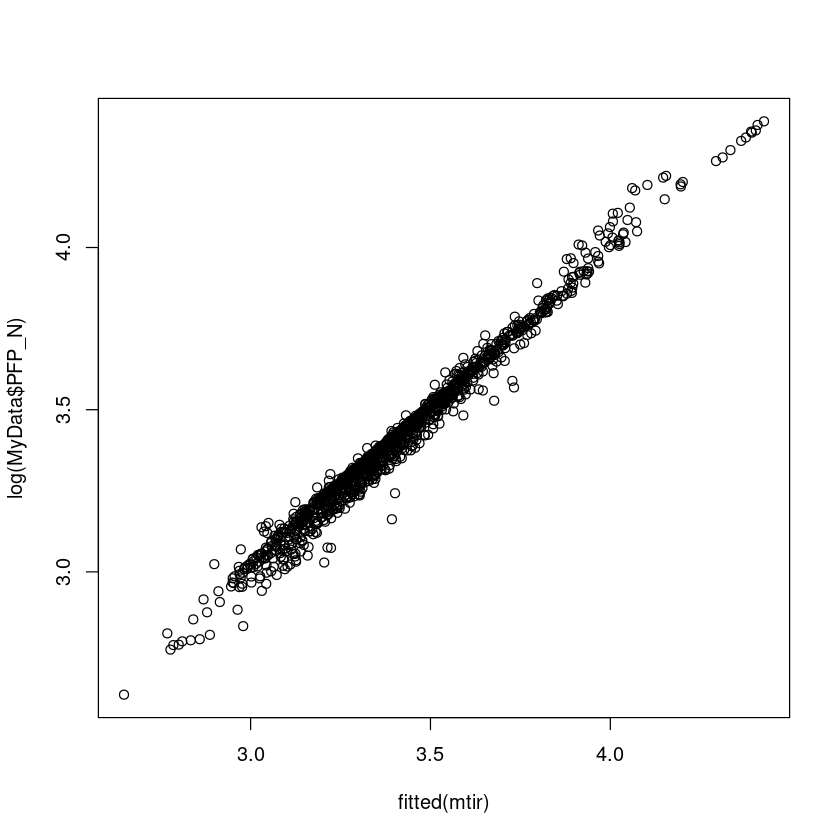

In [23]:
plot(log(MyData$PFP_N)~fitted(mtir))

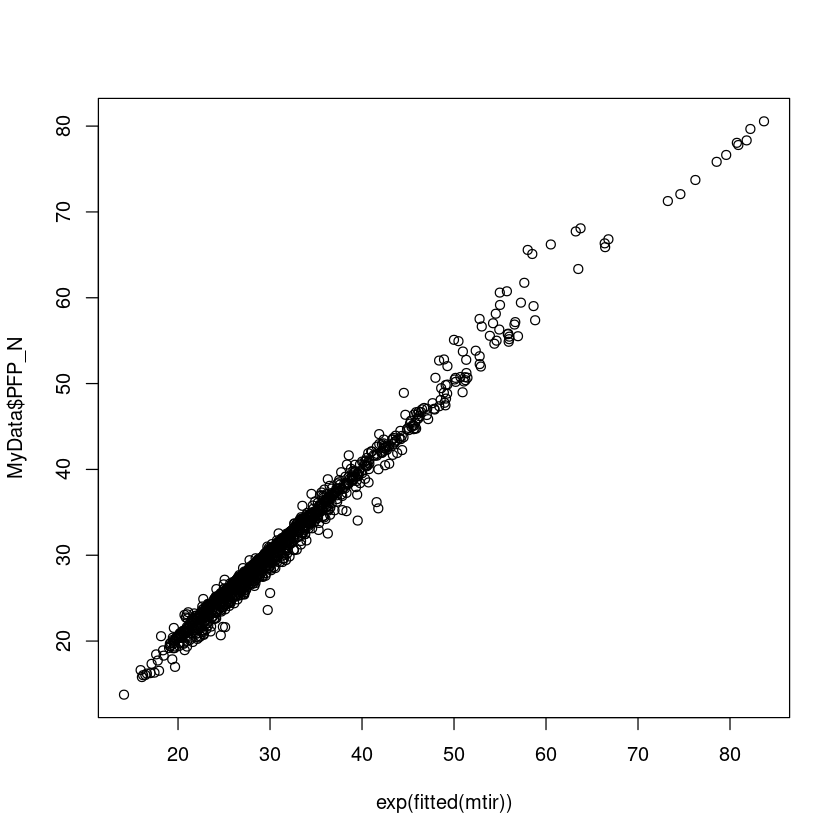

In [24]:
plot(MyData$PFP_N~exp(fitted(mtir)))

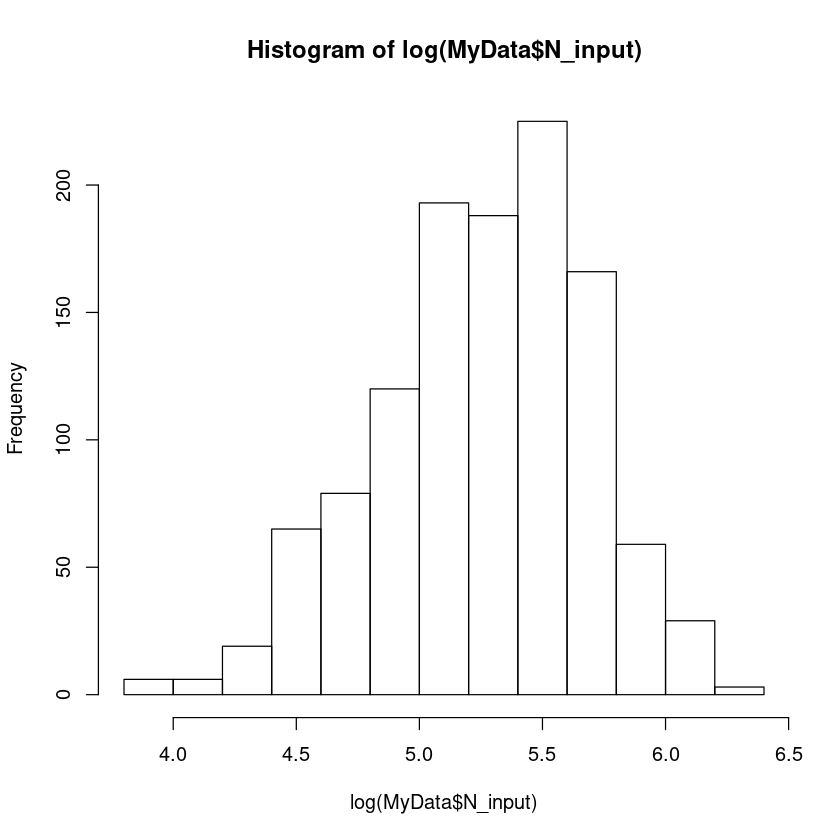

In [25]:
# What if we combine all Ns
MyData$N_input = MyData$Inorganic_N + MyData$Manure.cake_N + MyData$Straw_N
hist(log(MyData$N_input))

In [26]:
mc = lm(PFP_N~Yield+N_input, MyData)
summary(mc) # 0.86, just as good as when not combined


Call:
lm(formula = PFP_N ~ Yield + N_input, data = MyData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2597 -1.7847 -0.1395  0.9238 25.7851 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.278e+01  2.881e-01  113.78   <2e-16 ***
Yield        4.560e-03  5.427e-05   84.03   <2e-16 ***
N_input     -1.496e-01  2.186e-03  -68.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.614 on 1155 degrees of freedom
Multiple R-squared:  0.8594,	Adjusted R-squared:  0.8592 
F-statistic:  3531 on 2 and 1155 DF,  p-value: < 2.2e-16


In [27]:
AIC(m, mc) # Oddly enough m is a bit better; overfitting?

df AIC     
m  6  6207.206
mc 4  6266.965

In [28]:
mci = lm(PFP_N~Yield*N_input, MyData)
summary(mci) # Not a big change


Call:
lm(formula = PFP_N ~ Yield * N_input, data = MyData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0587 -1.6884 -0.3939  0.6963 26.7810 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.010e+01  5.829e-01  51.643  < 2e-16 ***
Yield          4.995e-03  9.858e-05  50.666  < 2e-16 ***
N_input       -1.369e-01  3.243e-03 -42.214  < 2e-16 ***
Yield:N_input -1.778e-06  3.383e-07  -5.257 1.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.573 on 1154 degrees of freedom
Multiple R-squared:  0.8627,	Adjusted R-squared:  0.8624 
F-statistic:  2417 on 3 and 1154 DF,  p-value: < 2.2e-16


In [29]:
mct = lm(log(PFP_N)~log(Yield)+log(N_input), MyData)
summary(mct) # We have a winner: R²=1


Call:
lm(formula = log(PFP_N) ~ log(Yield) + log(N_input), data = MyData)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.052e-15 -1.366e-15 -7.900e-17  1.307e-15  6.129e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)   0.000e+00  1.425e-15  0.000e+00        1    
log(Yield)    1.000e+00  2.931e-16  3.411e+15   <2e-16 ***
log(N_input) -1.000e+00  3.447e-16 -2.901e+15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.691e-15 on 1155 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.821e+30 on 2 and 1155 DF,  p-value: < 2.2e-16


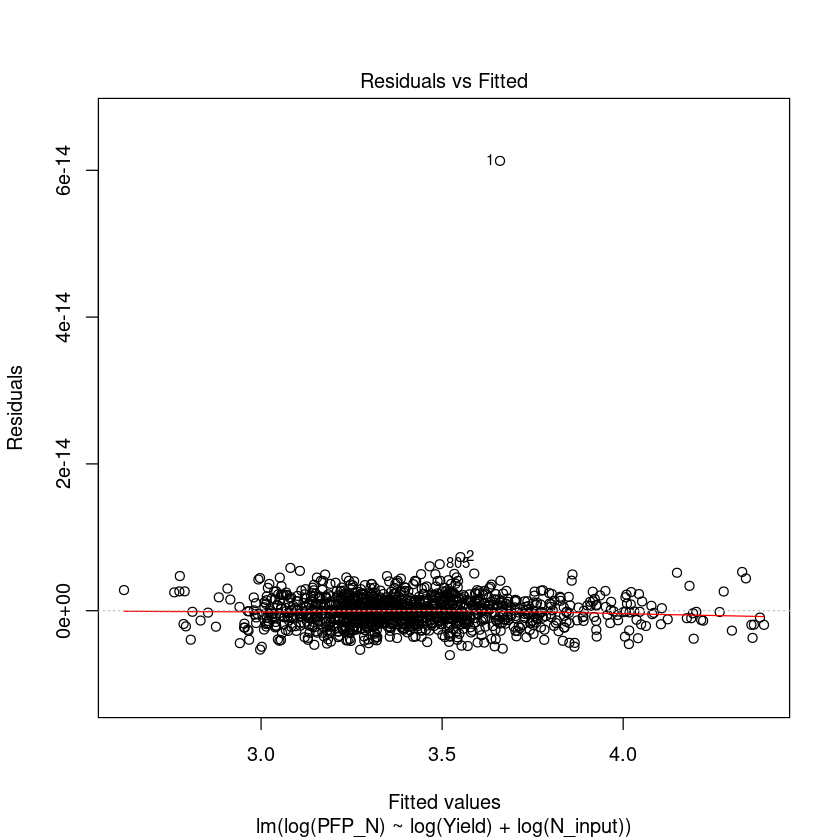

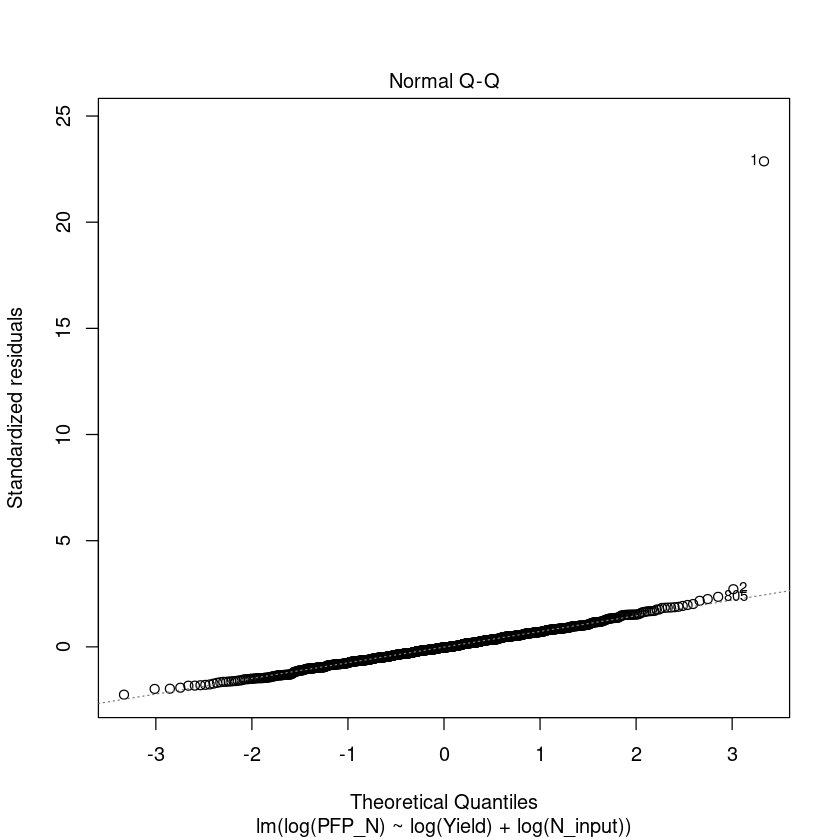

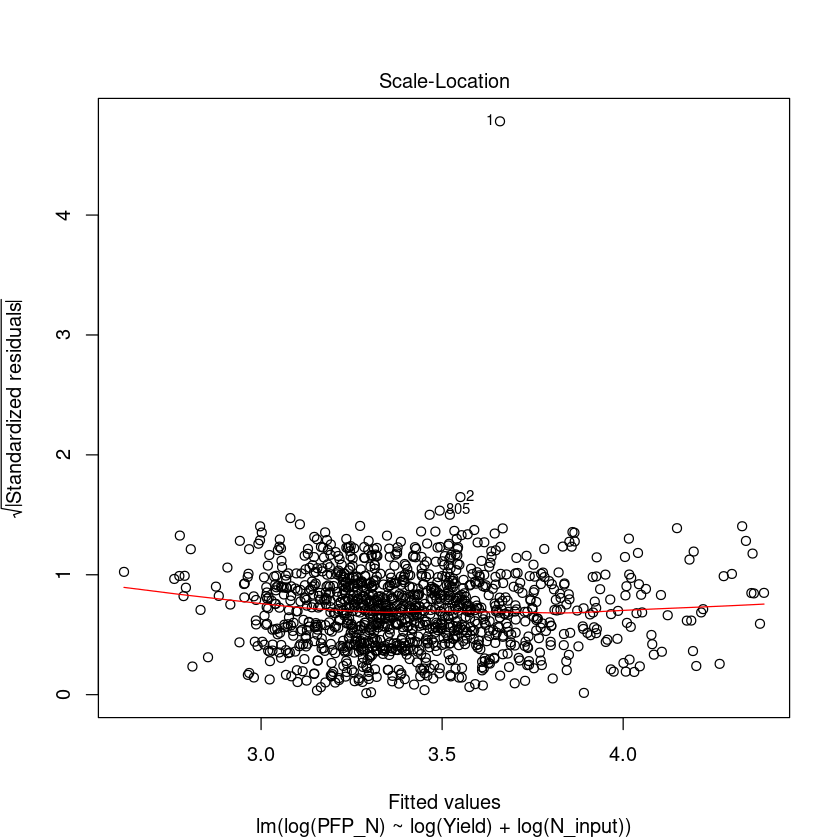

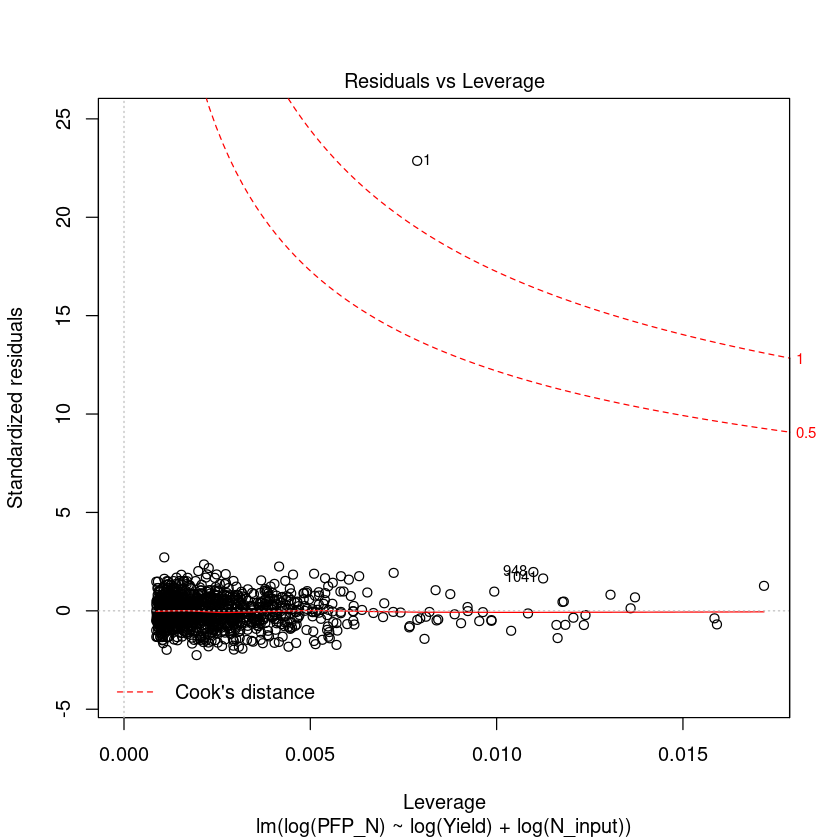

In [30]:
plot(mct)

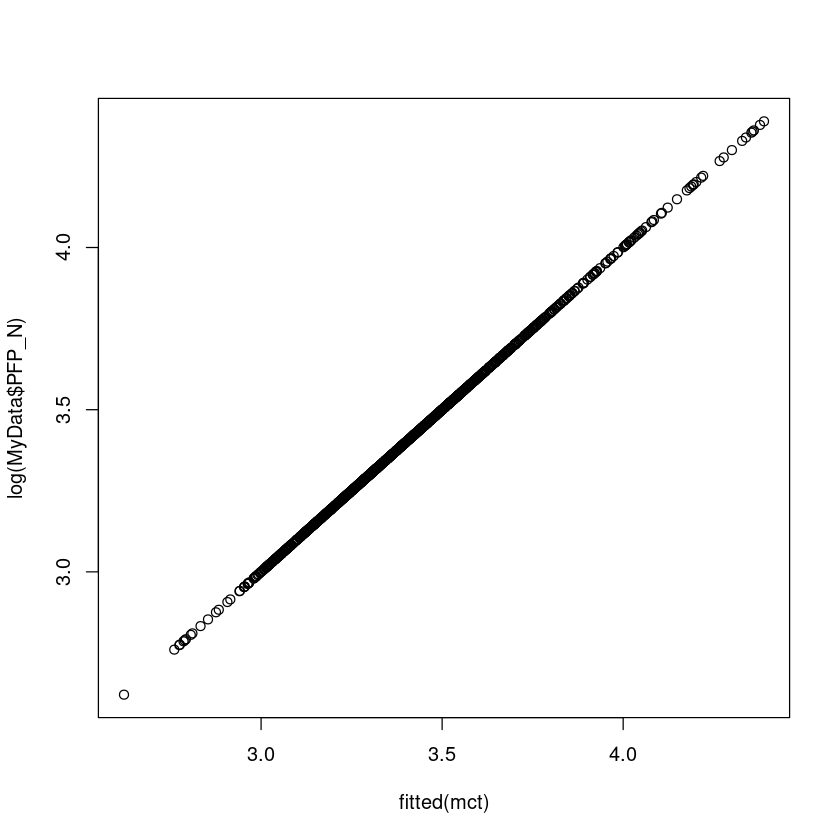

In [31]:
plot(log(MyData$PFP_N)~fitted(mct))

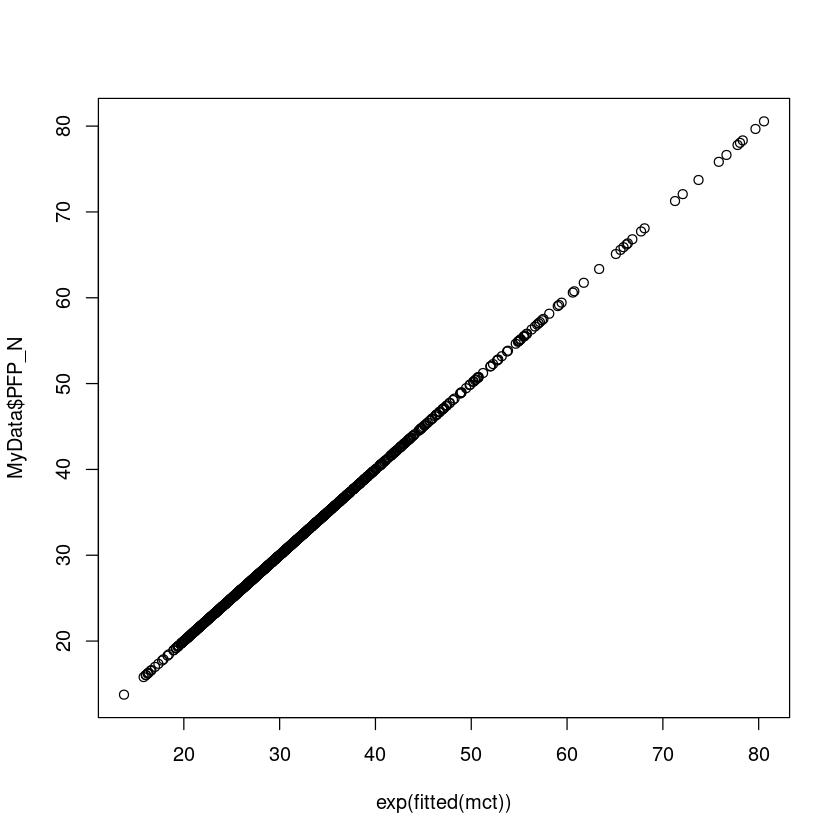

In [32]:
plot(MyData$PFP_N~exp(fitted(mct)))

In [33]:
car::vif(mct)

log(Yield) log(N_input) 
    3.363228     3.363228

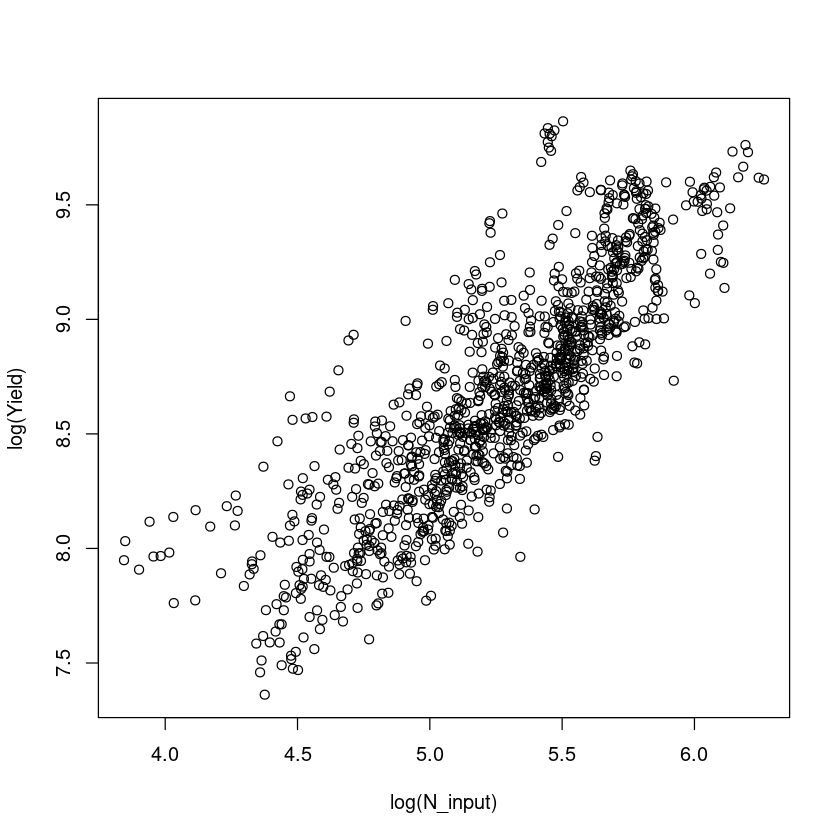

In [34]:
plot(log(Yield)~log(N_input), MyData)

In [35]:
# Can we do that without combining all Ns?
mt2 = lm(log(PFP_N)~log(Yield)+log(Inorganic_N)+log(Manure.cake_N)+log(Straw_N), MyData)
summary(mt2) # No; log(y)=log(a)x+log(b+c+d)x+e is different from log(y)=log(a)+log(b)x+log(c)x+log(d)x+e


Call:
lm(formula = log(PFP_N) ~ log(Yield) + log(Inorganic_N) + log(Manure.cake_N) + 
    log(Straw_N), data = MyData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81783 -0.02697  0.02031  0.04898  0.07806 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.885475   0.058521 -15.131  < 2e-16 ***
log(Yield)          0.993559   0.009350 106.262  < 2e-16 ***
log(Inorganic_N)   -0.474794   0.006614 -71.790  < 2e-16 ***
log(Manure.cake_N) -0.480523   0.007594 -63.277  < 2e-16 ***
log(Straw_N)       -0.030425   0.004247  -7.164 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07764 on 1153 degrees of freedom
Multiple R-squared:  0.9176,	Adjusted R-squared:  0.9173 
F-statistic:  3208 on 4 and 1153 DF,  p-value: < 2.2e-16


In [36]:
mt3 = lm(log(PFP_N)~log(Yield)+log(Inorganic_N)*log(Manure.cake_N)*log(Straw_N), MyData)
summary(mt3)


Call:
lm(formula = log(PFP_N) ~ log(Yield) + log(Inorganic_N) * log(Manure.cake_N) * 
    log(Straw_N), data = MyData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48032 -0.02053  0.00901  0.03183  0.07001 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                       4.172346   0.182019  22.923
log(Yield)                                        0.956813   0.005950 160.818
log(Inorganic_N)                                 -1.607540   0.043627 -36.848
log(Manure.cake_N)                               -1.667626   0.040374 -41.304
log(Straw_N)                                      0.111770   0.117576   0.951
log(Inorganic_N):log(Manure.cake_N)               0.282218   0.010287  27.434
log(Inorganic_N):log(Straw_N)                     0.002901   0.025450   0.114
log(Manure.cake_N):log(Straw_N)                   0.053415   0.027275   1.958
log(Inorganic_N):log(Manure.cake_N):log(Straw_N) -0.019057 